<a href="https://colab.research.google.com/github/LamuneGitHub/A001_Python_Test/blob/main/S13%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%matplotlib inline

from IPython.display import display

import re
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 줄 구분 표시 출력 
def print_line() :
  print ("\n------------------------------------------------")
def print_line_m() :
  print ("\n-----------------------")
def print_line_s() :
  print ("\n----------")


# 기타


In [5]:

# print
val_float = 123.126
print ( f"{ 34/10:n}"  ) # 정수로 ##? 왜? 어떤때는 되고 어떤 때는 안되지? 
print ( f"{ val_float : .2f}"  ) # 소숫점 2자리 반올림

# 절대값 
print ( abs(-100 ))


# 랜덤 배열 만들기 case 01
n_count = 50
variance_one = []
for x in range(n_count):
    variance_one.append(random.randint(25,76)) # 25부터 75까지 랜덤한 50개의 정수 저장

# 랜덤 배열 만들기 case 02
n_count = 50
variance_one = [ random.randint(25,76)  for x in range(n_count) ]


# 0 배열 50개 짜리
list(np.zeros(50))



# nd_array 만들기
array_1d = np.array([1,2,3,4,5])
array_2d = np.array( 
                    [
                      [1,2,3,4,5],
                      [2,4,6,8,10]
                    ]
                    )
print( array_1d )
print( array_2d )

3.4
 123.13
100
[1 2 3 4 5]
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]]


# # Vector

## nd_array 합치기  
https://engineer-mole.tistory.com/234



In [6]:
X = np.array([35, 10, 25, 40])
Y = np.array([0, 50, 50, 0])
Z = np.array([0, 0, 100, 0])

# 수평 합치기
arr_h = np.hstack( [X,Y,Z])
print (arr_h)
print_line()

# 수직 합치기
arr_v = np.vstack( [X,Y,Z])
print (arr_v)
print_line()

# stack 합치기 ( 기본 수직 )
arr_stack = np.stack( (X,Y,Z) )
print (arr_stack)
print_line()

[ 35  10  25  40   0  50  50   0   0   0 100   0]

------------------------------------------------
[[ 35  10  25  40]
 [  0  50  50   0]
 [  0   0 100   0]]

------------------------------------------------
[[ 35  10  25  40]
 [  0  50  50   0]
 [  0   0 100   0]]

------------------------------------------------


## array 정보 보기

## Rank

In [7]:
arr = arr_stack
print( np.linalg.matrix_rank( arr ) )

3


## 백터 연산

In [8]:
# 벡터 연산 : 스칼라 곱 (실수배)
print( X )
print( X * -1 )
print_line()

u1 = [1, 0]
u2 = np.multiply(3, u1)
print( u1 )
print( u2 )
print_line()

[35 10 25 40]
[-35 -10 -25 -40]

------------------------------------------------
[1, 0]
[3 0]

------------------------------------------------


## 곱 연산 (벡터) 
* .dot
* matmul
* @

In [9]:
price = np.array([100, 500, 250, 50])
X = np.array([35, 10, 25, 40])
Y = np.array([0, 50, 50, 0])
Z = np.array([0, 0, 100, 0])

# array 합치기
amount =  np.vstack( [X, Y, Z] )
print( amount)
print_line()


# case 01 : matmul 
res1 = np.matmul(amount, price)
print ( res1 )
print_line()

# case 02 : @ 연산자
res1 = amount @ price
print ( res1 )
print_line()

# case 03 : np.dot 이용
res1 = [np.dot(price, person) for person in (X, Y, Z)]
print ( res1 )
print_line()



[[ 35  10  25  40]
 [  0  50  50   0]
 [  0   0 100   0]]

------------------------------------------------
[16750 37500 25000]

------------------------------------------------
[16750 37500 25000]

------------------------------------------------
[16750, 37500, 25000]

------------------------------------------------


## 내적 값 (백터)
Dot Product라고 합니다.
두 벡터에 대해서 서로 대응하는 각각의 성분을 곱한 뒤 모두 합하여 구합니다. 이때 두 벡터의 차원이 같아야 합니다.

벡터를 내적한 값은 스칼라입니다. 
> $v_1 = [a_1, a_2, a_3, \cdots]$
>
> $v_2 = [b_1, b_2, b_3, \cdots]$
>
> $v_1 \cdot v_2 = a_1b_1 + a_2b_2 + a_3b_3 + \cdots$  

### * **백터의 내적이 0 이면 두 벡터는 서로 수직이다.**\




In [10]:
# case 01 : * 연산자 
print ( X * Y )
print ( f"내적 : {(X * Y).sum()}" )
print_line()

# case 02 : dot 연산자
print ( f"내적 : {np.dot(X,Y)}" )
print_line()

[   0  500 1250    0]
내적 : 1750

------------------------------------------------
내적 : 1750

------------------------------------------------


## 단위 벡터(Unit Vector)
  * 길이가  1 인 벡터입니다.


# # Matrix ( 행렬 )
- 수 또는 변수를 ( ) 안에 행과 열로 배열한 것입니다.
- 2차원 형태의 array 또는 list로 나타냅니다. 
- 행과 열의 개수는 **매트릭스의 차원**을 의미합니다. 이는 `.shape`을 통해 확인할 수 있습니다. 
- 두 매트릭스가 일치하려면 차원과 성분이 동일해야 합니다.
> $\begin{align}
X = 
    \begin{bmatrix}
           1 & 2 & 3\\
           4 & 5 & 6\\
           7 & 8 & 9
    \end{bmatrix}
    \qquad
    Y = \begin{pmatrix}
           1 & 2 & 3\\
           4 & 5 & 6
    \end{pmatrix}
 \end{align}$

In [11]:
array_1d = np.array([1,2,3,4,5])
array_2d = np.array( 
                    [
                      [1,2,3,4,5],
                      [2,4,6,8,10]
                    ]
                    )

# 차원 확인

# .ndim을 사용하여 배열의 차원 확인
print ( array_1d.ndim )
print ( array_2d.ndim )
print_line()

# .shape을 사용하여 벡터의 차원 확인
print ( array_1d.shape ) 
print ( array_2d.shape ) 
print_line()


1
2

------------------------------------------------
(5,)
(2, 5)

------------------------------------------------


## 행렬의 전치(Transpose)

- 행과 열을 바꾸어 나타내는 것입니다.
- 일반적으로 $A^T$로 표기합니다. 
- `.T` 또는 [`np.transpose()`](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html)를 사용하여 구할 수 있습니다. 
- 전치의 전치는 자기 자신입니다.
> $(A^T)^T=A$ 

In [12]:
print( array_2d )
print_line()

# case 01 
print( array_2d.T )
print_line()

# case 02
print( np.transpose (array_2d) )
print_line()

[[ 1  2  3  4  5]
 [ 2  4  6  8 10]]

------------------------------------------------
[[ 1  2]
 [ 2  4]
 [ 3  6]
 [ 4  8]
 [ 5 10]]

------------------------------------------------
[[ 1  2]
 [ 2  4]
 [ 3  6]
 [ 4  8]
 [ 5 10]]

------------------------------------------------


## 행렬곱(Matrix Multiplication)
- 두 행렬에 대해서 앞 행렬의 열과 뒷 행렬의 행의 수가 같으면 행렬끼리 곱할 수 있습니다. 
- [`np.matmul()`](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html)을 사용하여 구할 수 있습니다.
- 행렬곱의 결과는 행렬입니다. 
- 두 행렬의 차원이 $m\times l$, $l\times n$이면 행렬곱으로 얻은 행렬의 차원은 $m\times n$입니다. 
> <img src="https://i.imgur.com/x6ePoVz.png" width=450> 

In [13]:
mat_a = np.array([[1,2,3], [4,5,6]])
mat_b = np.array([[1,-1,0,2],[0,1,2,-1],[2,3,-1,1]])

np.matmul(mat_a, mat_b) # 2x3와 3x4의 행렬곱 결과는 2x4

array([[ 7, 10,  1,  3],
       [16, 19,  4,  9]])

## * 정사각 행렬(Square Matrix)
행과 열의 수가 동일한 매트릭스입니다.



## * 대각 행렬(Diagonal Matrix)
주 대각선(principal diagonal)을 제외한 모든 성분이 $0$인 정사각 행렬입니다.
> $D =
\begin{bmatrix}
a_{1,1} & 0 & 0 \\
0 & a_{2,2} & 0 \\
0 & 0 & a_{3,3} 
\end{bmatrix}$

## * 단위 행렬(Identity Matrix)
- 대각 행렬 중에서 주 대각선 성분이 모두 $1$인 매트릭스입니다. 
- [`np.identity()`](https://numpy.org/doc/stable/reference/generated/numpy.identity.html) 또는 [`np.eye()`](https://numpy.org/devdocs/reference/generated/numpy.eye.html)를 사용하여 나타낼 수 있습니다.
> $I_1 =
\begin{bmatrix}
  1
\end{bmatrix}
\qquad
I_2 =
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\qquad
I_3 =
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 
\end{bmatrix}$
- 임의의 정사각 행렬에 단위 행렬을 곱한 것은 자기 자신과 같습니다.
> $AI=A$

In [14]:
# np.eye()를 사용하여 단위 행렬 생성
print('1차원 단위 행렬 :\n', np.eye(1, dtype=int), '\n')
print('2차원 단위 행렬 :\n', np.eye(2, dtype=int), '\n')
print('3차원 단위 행렬 :\n', np.eye(3, dtype=int))

1차원 단위 행렬 :
 [[1]] 

2차원 단위 행렬 :
 [[1 0]
 [0 1]] 

3차원 단위 행렬 :
 [[1 0 0]
 [0 1 0]
 [0 0 1]]


## 역행렬
- 임의의 정사각 행렬에 대하여 곱했을 때 단위 행렬이 되도록 하는 행렬을 **역행렬(Inverse)**이라고 하며 $A^{-1}$과 같이 표기합니다. 
> $AA^{-1}=I$
- 역행렬을 구하는 식은 다음과 같습니다.
> $A^{-1} = {1 \over ad-bc}\begin{bmatrix}d & -b\\-c & a\end{bmatrix} \quad$ 
where $A = \begin{bmatrix}a & b \\c & d\end{bmatrix}$
- [`np.linalg.inv()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html)를 사용하여 구할 수 있습니다.


## 행렬식(Determinant)
- 정사각 행렬 $A$에 대해서 det($A$) 또는 $|A|$로 표기합니다.
- $2\times2$ 행렬식은 다음과 같습니다.  
> $|A| = ad-bc \quad$ where $\ A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$
- $3\times3$ 행렬식은 다음과 같습니다. 
> $|A| = a(ei-fh)-b(di-fg)+c(dh-eg) \quad$ 
where $\ A = \begin{bmatrix} a & b &c \\ d & e & f \\ g & h & i \end{bmatrix}$
- 이와 같이 $n\times n$ 행렬에 대한 행렬식을 구할 수 있습니다.
- [`np.linalg.det()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.det.html)를 사용하여 구할 수 있습니다.  

### * **행렬식이 0 이면 역행렬이 존재하지 않는다.**

In [15]:
mat_c = np.array([[8,12],[9,16]])
print(f"원본 {mat_c}")

# 역행렬
inv = np.linalg.inv(mat_c)
print( f"역행렬 {inv}" )

# 행렬식
det = np.linalg.det(mat_c)
print( f"행렬식 = ad - bc {det}" )

원본 [[ 8 12]
 [ 9 16]]
역행렬 [[ 0.8  -0.6 ]
 [-0.45  0.4 ]]
행렬식 = ad - bc 19.999999999999996


### **선형 관계의 벡터(Linearly Dependent Vectors)**
- 두 벡터가 같은 선상에 있는 경우, 이 벡터들은 선형 관계에 있다고 표현합니다.

### **선형 관계가 없는 벡터(Linearly Independent Vectors)**
- 같은 선상에 있지 않은 벡터들은 선형적으로 독립되어 있다고 표현합니다.
- 선형 관계에 있지 않은 벡터들이 만들어내는 Span의 차원은 벡터의 수와 같습니다. 

## **Basis**
- 벡터 공간 $V$의 basis는 $V$라는 공간을 채울 수 있는 선형 관계에 있지 않은 벡터들의 모음입니다. (span의 역개념)
- 위의 그림에서 2개의 벡터(빨강, 파랑)는 벡터 공간 $\mathbb{R}^2$(2차원 평면)의 basis입니다.

## **Span**
주어진 두 벡터의 조합으로 만들 수 있는 모든 가능한 벡터의 집합입니다. 

## **Rank**
- 매트릭스의 열을 이루는 벡터들로 만들 수 있는 공간(span)의 차원입니다. 
- 행렬의 선형 독립인 행 또는 열의 최대 개수입니다. 
- 행 또는 열을 이루는 벡터들 중 선형 관계에 있는 경우 행렬의 차원과 다를 수 있습니다. 
- [`np.linalg.matrix_rank()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.matrix_rank.html)를 사용해 구할 수 있습니다. 

In [16]:
# 선형독립인 경우
mat_a = np.array([[1,1],[3,4]])
print ( np.linalg.matrix_rank(mat_a) )

# 선형독립이 아닌 경우
mat_b = np.array([[1,1],[3,3]])
print ( np.linalg.matrix_rank(mat_b) )

2
1


----

# **Eigenstuff**
- numpy를 사용하여 $T$에 대한 eigenvalue와 eigenvector를 구하세요. 
> $T = \begin{bmatrix} 9 & 4 \\ 4 & 3 \end{bmatrix}$

In [17]:
T = np.array ([
    [9,4]
    ,[4,3]
])

# Case 01
eigenstuff = np.linalg.eig(T)

# 출력
for i in range( len(eigenstuff[0] ) ):
  eigenvalue = eigenstuff[0][i]
  eigenvector = eigenstuff[1][:,i].round(2)
  print ( f"({eigenvalue},{eigenvector.tolist()})" , end=' ' )



(11.0,[0.89, 0.45]) (1.0,[-0.45, 0.89]) 

----
# **# PCA**

차원 축소

### **분산(Variance)**
- 데이터가 흩어져 있는 정도를 하나의 값으로 나타낸 것입니다. 
- 데이터가 서로 멀리 떨어져 있을수록 분산의 값이 커집니다. 
- 편차 제곱의 평균으로 구합니다.
> $\sigma^2 = \frac{\sum{(X_{i} - \overline{X})^{2}} }{N} \quad$ where $\ $ $X_i$:관측값 , $\bar{X}$:평균 , $N$: 관측값 개수
- [`df.var()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html) 또는 [`np.var()`](https://numpy.org/doc/stable/reference/generated/numpy.var.html)를 사용해 구할 수 있습니다. 


- 편차 = (관측값) - (평균)
- 편차의 합은 항상 $0$이기 때문에 편차의 평균도 항상 $0$입니다.

In [18]:
# 분산 구하기 case 01
# df.var()를 사용해 분산 구하기 
print('v1 분산 :', variance_df.v1.var())
print('v2 분산 :', variance_df.v2.var())

# 분산 구하기 case 02
# np.var()를 사용해 분산 구하기
print('v1 분산 :', np.var(variance_df.v1, ddof=1))
print('v2 분산 :', np.var(variance_df.v2, ddof=1))

NameError: name 'variance_df' is not defined

## **표준편차(Standard Deviation)**
- 분산의 제곱근($\sqrt{ﾠ}$) 값입니다. 
- 분산의 스케일을 조정하는 효과가 있습니다. 
- [`df.std()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html) 또는 [`np.std()`](https://numpy.org/doc/stable/reference/generated/numpy.std.html)를 사용해 구할 수 있습니다.

In [ ]:
# 표준편차 구하기 case 01
# df.std()를 사용해 표준편차 구하기 
print('v1 표준편차 :', variance_df.v1.std())
print('v2 표준편차 :', variance_df.v2.std())


# 표준편차 구하기 case 02
# np.std()를 사용해 표준편차 구하기
print('v1 표준편차 :', np.std(variance_df.v1, ddof=1))
print('v2 표준편차 :', np.std(variance_df.v2, ddof=1))

 ## **공분산(Covariance)과 상관계수(Correlation coefficient)**

## **공분산(Covariance)**
- 두 변수에 대하여 한 변수가 변화할 때 다른 변수가 어떠한 연관성을 갖고 변하는지를 나타낸 값입니다. <br>
  <img src = 'https://i.imgur.com/tWPxfyI.png' width=500>
- 두 변수의 연관성이 클수록 공분산 값도 커집니다. 
- 두 변수의 스케일이 크다면 공분산 값이 커지게 된다. 
유사한 연관성이라도, 스케일이 큰 변수들은 스케일이 작은 변수들에 비해서 높은 공분산 값을 가지게 될 것입니다.


### **분산-공분산 행렬(variance-covariance matrix)**
- 모든 변수에 대하여 분산과 공분산 값을 나타내는 정사각 행렬입니다. 
  - 주 대각선 성분은 자기 자신의 분산 값을 나타냅니다.
  - 주 대각선 이외의 성분은 가능한 두 변수의 공분산 값을 나타냅니다.
- [`df.cov()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html) 또는 [`np.cov()`](https://numpy.org/doc/stable/reference/generated/numpy.cov.html)를 사용하여 구할 수 있습니다. 


 

In [ ]:
# case 01
# df.cov()를 사용하여 공분산 행렬 나타내기 
df.cov()


# case 02
# np.cov()를 사용하여 공분산 행렬 나타내기 
np.cov(df.T)

## **상관계수(Correlation coefficient)**
- 공분산을 두 변수의 표준편차로 나눠준 값입니다. 
  > $r_{x, y} = \frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}}$
- 공분산의 스케일을 조정하는 효과가 있습니다.
- 변수의 스케일에 영향을 받지 않습니다. 
- -1에서 1 사이의 값을 가집니다. 상관계수가 1이라는 것은 한 변수가 다른 변수에 대해서 완벽한 양의 선형 관계를 갖고 있다는 것을 의미합니다. <br>
  <img src = 'https://i.imgur.com/25t6mK2.png' width=500>
- [`df.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) 또는 [`np.corrcoef()`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)를 사용하여 구할 수 있습니다.


In [ ]:
# case 01
# df.corr()를 사용하여 상관계수 나타내기
df.corr()


# case 02
# np.corrcoef()를 사용하여 상관계수 나타내기
np.corrcoef(df.T)


### PCA ( 주성분 분석(Principal Component Analysis, PCA) )

In [19]:
# test 데이터 준비

import seaborn as sns
df = sns.load_dataset( 'penguins')

species = df['species']
features = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'  ]]

# 하나라도 결측치가 있는 data 조건 case 02
features_null = features.isnull().any(axis=1)
features_null =  features[ features_null]

# 결측치 data 제거
features = features.drop(features_null.index).reset_index ( drop=True)
species = species.drop(features_null.index).reset_index ( drop=True)

In [20]:
# 데이터 표준화 case 01
X = features
standardized_data = ( X - np.mean(X, axis = 0) ) / np.std(X, ddof=1, axis = 0)
z = standardized_data
print("\n Standardized Data: \n", standardized_data)



# 데이터 표준화 case 02
# StandardScaler()를 사용하여 데이터 표준화  # : np를 사용하여 직접 계산한 값과는 차이가 있다.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
Z = scaler.fit_transform(X)
print("\n Standardized Data: \n", Z)



# 표준화한 데이터에 대하여 pca 시행 에이간값, 에이간 벡터를 구한다.
pca_count = 2

pca = PCA(pca_count) 
pca.fit(Z)

print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

B = pca.transform(Z)
print("\n Projected Data: \n", B[:10]) # 10개만 출력


 Standardized Data: 
      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0         -0.883205       0.784300          -1.416272    -0.563317
1         -0.809939       0.126003          -1.060696    -0.500969
2         -0.663408       0.429833          -0.420660    -1.186793
3         -1.322799       1.088129          -0.562890    -0.937403
4         -0.846572       1.746426          -0.776236    -0.688012
..              ...            ...                ...          ...
337        0.600425      -1.747611           0.930526     0.901854
338        0.527159      -1.443781           1.001641     0.808332
339        1.186550      -0.734846           1.499447     1.930590
340        0.234097      -1.190590           0.788296     1.244766
341        1.094968      -0.532294           0.859411     1.494157

[342 rows x 4 columns]

 Standardized Data: 
 [[-0.88449874  0.78544923 -1.41834665 -0.56414208]
 [-0.81112573  0.1261879  -1.06225022 -0.50170305]
 [-0.66437972  0.4304623

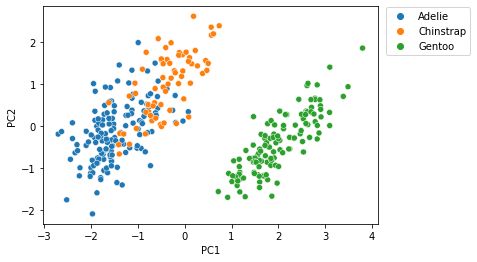

In [21]:
# 시각화
df_tmp = pd.DataFrame( {'species':species , 'PC1':B[:,0] , 'PC2':B[:,1] } )

sns.scatterplot( data=df_tmp , hue = 'species' , x='PC1', y='PC2')
plt.legend(bbox_to_anchor=(1.01, 1.02))
plt.show()

In [22]:
#variance의 ratio의 합

# case 01
var_ratio = pca.explained_variance_ratio_
print( var_ratio[0] + var_ratio[1])

# case 02
print( pca.explained_variance_ratio_.sum() )

0.8815679694372632
0.8815679694372632


In [ ]:
# 필요한 pca 갯수 계산 

# 일반적인 경우에는 목표 분산치를 입력하면 자동으로 계산하는 식으로 처리 한다.
# pca = PCA(n_components=0.95 ) #=> 목표치 95% 이상 
# pca = PCA(n_components=95 ) #=> pc 사용갯수 95개  

pca = PCA(4) 
pca.fit(Z)

# 90% 이상을 만족하기 위해 필요한 PC 갯수
tmp_cnt = 0
tmp_total_ratio = 0
var_ratio = pca.explained_variance_ratio_
for x in var_ratio :
  tmp_total_ratio += x
  tmp_cnt += 1
  
  if tmp_total_ratio >= 0.9 :
    break

print ( f" 필요한 PC 갯수 {tmp_cnt} , {tmp_total_ratio}" )
  

### Scree Plot

ValueError: shape mismatch: objects cannot be broadcast to a single shape

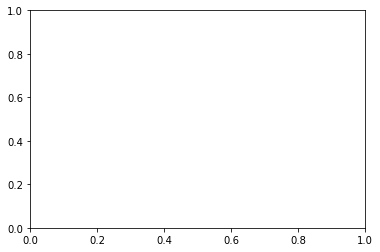

In [23]:
# var ratio bar 차트
plt.bar(range(1, 5), pca.explained_variance_ratio_, alpha=0.5, color='r')

# 꺽은선 그래프  , 누적
plt.plot(range(1, 5), np.cumsum(pca.explained_variance_ratio_))

# x 축 값을 수동 지정
plt.xticks([1, 2, 3, 4])


for i in range(1, 5):

    # 막대 그래프에 값 표시 
    plt.text(i, pca.explained_variance_ratio_[i-1]+0.05,
             pca.explained_variance_ratio_[i-1].round(2),
             horizontalalignment='center')
    
    if i > 1:
        # 꺽은선 그래프에 누적값 표시
        plt.text(i, np.cumsum(pca.explained_variance_ratio_)[i-1]-0.08,
                 np.cumsum(pca.explained_variance_ratio_)[i-1].round(2),
                 horizontalalignment='center')
        
# label 
plt.xlabel("pc")
plt.ylabel("rate")

plt.show()

----
# Cramer's rule 이용해서 방정식 구하기

> $x_1$ + $2x_3$ = 6
>
> $-3x_1$ + $4x_2$ + $6x_3$ = 30
>
> $-x_1$ $-2x_2$ + $3x_3$ = 8


--> AX = B 형식으로



In [ ]:
# 방정식 구하기 ( 3원 1차)
A = np.array (
              [  [ 1 , 0 , 2 ], 
                [-3 , 4 , 6 ],
                [-1 , -2 , 3 ]
              ]
              )

B = np.array (  [ 6 , 30 , 8 ] )

# 크래머 법칙으로 방정식 구하기 
X = np.linalg.solve(A, B)

print( X.round(2) )


----
# 시각화

## 벡터 시각화

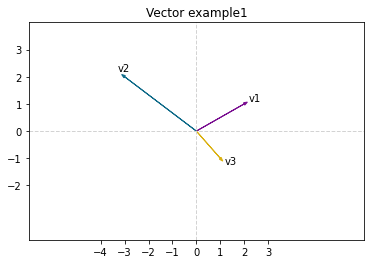

In [24]:
# 파이썬으로 벡터 나타내기 

import matplotlib.pyplot as plt
import numpy as np

# 값 지정
v1 = [2, 1]
v2 = [-3, 2]
v3 = [1, -1]


# 그래프 제목
plt.title('Vector example1')

# 그래프 표시 범위 지정
plt.xlim(-7, 7)          
plt.ylim(-4, 4)

# 그래프 표시 축 값 지정
plt.xticks(np.arange(-4, 4))
plt.yticks(np.arange(-2, 4))



# X 축 , Y축
plt.axhline(0, 0, 1, color='lightgray', linestyle='--', linewidth=1)  # x 축
plt.axvline(0, 0, 1, color='lightgray', linestyle='--', linewidth=1)  # y 축


# 화살표 표시
plt.arrow(0, 0, v1[0], v1[1], head_width=0.1, color='#790D90')
plt.text(2.2, 1.1, 'v1')

plt.arrow(0, 0, v2[0], v2[1], head_width=0.1, color='#0E6A88')
plt.text(-3.3, 2.2, 'v2')

plt.arrow(0, 0, v3[0], v3[1], head_width=0.1, color='#DAB00F')
plt.text(1.2, -1.2, 'v3')


plt.show()

In [ ]:
# 

# 피봇 



,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
year,,,,,,,,,,,,
1949,1.000000,0.949435,0.944994,0.905623,0.970144,0.911553,0.908190,0.940419,0.933350,0.912513,0.901456,0.887272
1950,0.949435,1.000000,0.946923,0.957062,0.880477,0.930967,0.949866,0.938707,0.934320,0.904400,0.927191,0.887417
1951,0.944994,0.946923,1.000000,0.923131,0.939609,0.959165,0.939515,0.946961,0.946232,0.911054,0.947280,0.894268
1952,0.905623,0.957062,0.923131,1.000000,0.861005,0.942879,0.956044,0.960854,0.963146,0.960107,0.962860,0.925008
1953,0.970144,0.880477,0.939609,0.861005,1.000000,0.913945,0.884986,0.929524,0.928578,0.907120,0.902622,0.894288
1954,0.911553,0.930967,0.959165,0.942879,0.913945,1.000000,0.989433,0.984947,0.986983,0.962541,0.988882,0.965944
1955,0.908190,0.949866,0.939515,0.956044,0.884986,0.989433,1.000000,0.985527,0.982708,0.961328,0.984109,0.974451
1956,0.940419,0.938707,0.946961,0.960854,0.929524,0.984947,0.985527,1.000000,0.997125,0.983194,0.983704,0.977851
1957,0.933350,0.934320,0.946232,0.963146,0.928578,0.986983,0.982708,0.997125,1.000000,0.986762,0.988408,0.977076


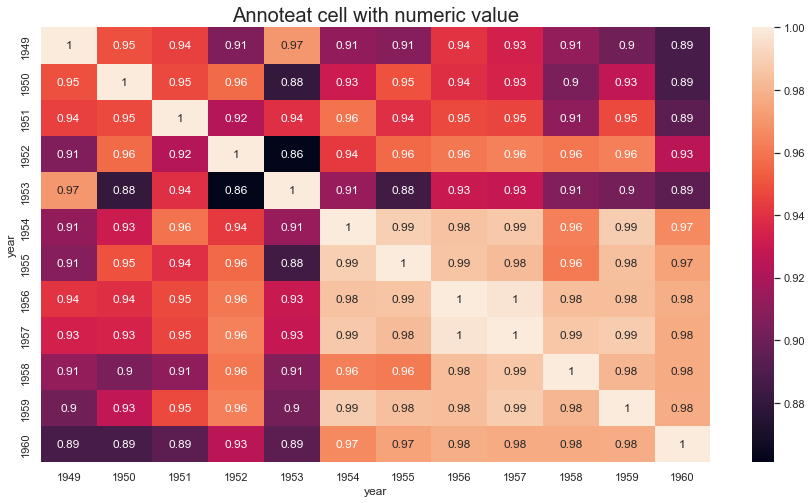

In [25]:
import seaborn as sns

# seaborn의 내장 데이터셋 - 연도별 월별 승객 수 
flights = sns.load_dataset('flights')
display ( flights.head() )


# PIVOT
# 월별 연도별 승객수를 집계한 피벗 테이블(pivot table)
df = flights.pivot('month', 'year', 'passengers')
display ( df )


# 연도별 상관계수 
df_corr = df.corr()
display( df_corr )

# Heat Map 그리기
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_corr, annot=True)
plt.title('Annoteat cell with numeric value', fontsize=20)
plt.show()